In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("StockX-Data-Contest-2019-3-Clean-Data.csv")
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7,0.94,2016,9,24,2017,9,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2,0.77,2016,11,23,2017,9,1
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2,0.77,2016,11,23,2017,9,1
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2,0.77,2016,11,23,2017,9,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8,0.55,2017,2,11,2017,9,1


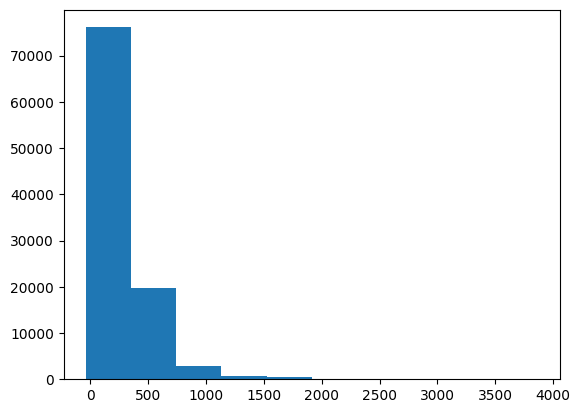

In [3]:
plt.hist(df["Profit Margin"])
plt.show()

In [4]:
df.describe()

,Sale Price,Retail Price,Shoe Size,Profit Margin,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
count,99956.000000,99956.00000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000
mean,446.634719,208.61359,9.344181,238.021129,183.708722,26.172664,0.503279,2017.467246,8.052243,21.673696,2018.029013,7.532654,16.150686
std,255.982969,25.20001,2.329588,266.133179,232.354142,33.102133,0.636527,0.579352,3.612667,7.805765,0.542357,4.089962,9.085088
min,186.000000,130.00000,3.500000,-34.000000,-69.000000,-9.800000,-0.190000,2015.000000,2.000000,1.000000,2017.000000,1.000000,1.000000
25%,275.000000,220.00000,8.000000,58.000000,10.000000,1.400000,0.030000,2017.000000,6.000000,16.000000,2018.000000,3.000000,8.000000
50%,370.000000,220.00000,9.500000,154.000000,56.000000,8.000000,0.150000,2017.000000,9.000000,25.000000,2018.000000,8.000000,16.000000
75%,540.000000,220.00000,11.000000,342.000000,345.000000,49.200000,0.950000,2018.000000,11.000000,27.000000,2018.000000,11.000000,24.000000
max,4050.000000,250.00000,17.000000,3860.000000,1321.000000,188.200000,3.620000,2019.000000,12.000000,30.000000,2019.000000,12.000000,31.000000


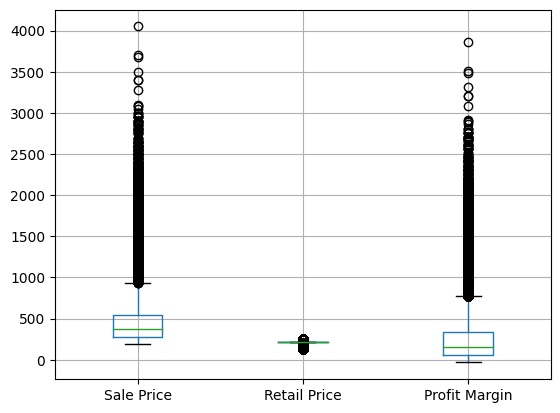

In [5]:
boxplot = df.boxplot(column=['Sale Price', 'Retail Price', 'Profit Margin'])

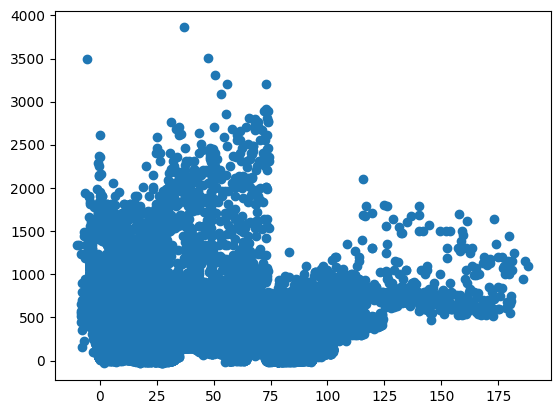

In [6]:
plt.scatter(df["Elapsed Time Weeks"], df["Profit Margin"])
plt.show()

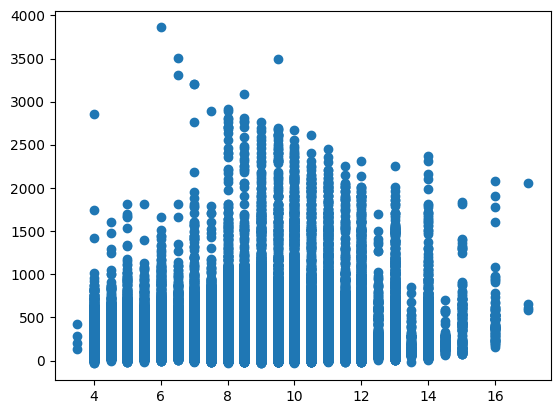

In [7]:
plt.scatter(df["Shoe Size"], df["Profit Margin"])
plt.show()

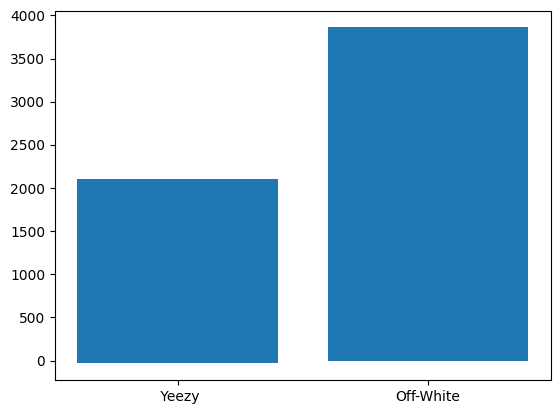

In [8]:
plt.bar(df['Brand'], df['Profit Margin'])
plt.show()

In [9]:
filt = df['Brand'].str.contains('Off-White')
df.loc[filt, 'Sneaker Name'].nunique()

30

In [10]:
filt = df['Sale Price'] == 4050
df.loc[filt]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
78162,2018-05-26,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,4050,190,2017-09-09,6.0,Wisconsin,3860,Chicago,Air-Jordan-1-Retro-High,259,36.9,0.71,2017,9,9,2018,5,26


In [11]:
df.describe()

,Sale Price,Retail Price,Shoe Size,Profit Margin,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
count,99956.000000,99956.00000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000
mean,446.634719,208.61359,9.344181,238.021129,183.708722,26.172664,0.503279,2017.467246,8.052243,21.673696,2018.029013,7.532654,16.150686
std,255.982969,25.20001,2.329588,266.133179,232.354142,33.102133,0.636527,0.579352,3.612667,7.805765,0.542357,4.089962,9.085088
min,186.000000,130.00000,3.500000,-34.000000,-69.000000,-9.800000,-0.190000,2015.000000,2.000000,1.000000,2017.000000,1.000000,1.000000
25%,275.000000,220.00000,8.000000,58.000000,10.000000,1.400000,0.030000,2017.000000,6.000000,16.000000,2018.000000,3.000000,8.000000
50%,370.000000,220.00000,9.500000,154.000000,56.000000,8.000000,0.150000,2017.000000,9.000000,25.000000,2018.000000,8.000000,16.000000
75%,540.000000,220.00000,11.000000,342.000000,345.000000,49.200000,0.950000,2018.000000,11.000000,27.000000,2018.000000,11.000000,24.000000
max,4050.000000,250.00000,17.000000,3860.000000,1321.000000,188.200000,3.620000,2019.000000,12.000000,30.000000,2019.000000,12.000000,31.000000


In [12]:
filt = df['Brand'] == ' Yeezy'
yzy_df = df.loc[filt]
yzy_df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7,0.94,2016,9,24,2017,9,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2,0.77,2016,11,23,2017,9,1
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2,0.77,2016,11,23,2017,9,1
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2,0.77,2016,11,23,2017,9,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8,0.55,2017,2,11,2017,9,1


In [13]:
filt = yzy_df['Colorway'].str.contains('Core-Black-Red')
yzy_df.loc[filt].describe()

,Sale Price,Retail Price,Shoe Size,Profit Margin,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
count,1271.000000,1271.0,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,836.013375,220.0,9.771440,616.013375,483.619197,68.898190,1.324933,2016.762392,4.138474,13.851298,2017.831629,7.185681,15.553108
std,114.216305,0.0,1.930353,114.216305,161.093722,22.949423,0.441379,0.425785,3.832068,5.109424,0.542645,3.824721,8.905902
min,636.000000,220.0,4.000000,416.000000,202.000000,28.800000,0.550000,2016.000000,2.000000,11.000000,2017.000000,1.000000,1.000000
25%,761.000000,220.0,8.500000,541.000000,342.000000,48.700000,0.940000,2017.000000,2.000000,11.000000,2018.000000,4.000000,8.000000
50%,800.000000,220.0,10.000000,580.000000,478.000000,68.100000,1.310000,2017.000000,2.000000,11.000000,2018.000000,8.000000,15.000000
75%,886.000000,220.0,11.000000,666.000000,626.500000,89.250000,1.720000,2017.000000,2.000000,11.000000,2018.000000,11.000000,24.000000
max,1575.000000,220.0,16.000000,1355.000000,812.000000,115.700000,2.220000,2017.000000,11.000000,23.000000,2019.000000,12.000000,31.000000


In [14]:
df['Sale Price'].sum()

44643820